In [10]:
import faces

In [15]:
faces.load_data()

AttributeError: module 'faces' has no attribute 'load_data'

In [12]:
(x_train, y_train), (x_test, y_test) = faces.load_data()

AttributeError: module 'faces' has no attribute 'load_data'

In [4]:
x_train.shape, x_train.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
y_train.shape, y_train.dtype

((60000,), dtype('uint8'))

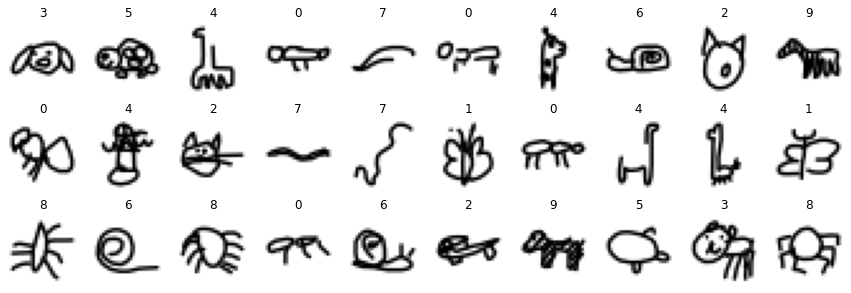

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_train[img], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(y_train[img])
plt.show()

In [7]:
x_train = x_train.astype(float).reshape(-1, 28*28) / 255.0
x_test = x_test.astype(float).reshape(-1, 28*28) / 255.0

In [8]:
x_train.shape

(60000, 784)

In [9]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [10]:
y_test[:10]

array([8, 1, 9, 2, 6, 2, 2, 9, 4, 2], dtype=uint8)

In [11]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
# Deep learning 

# create model
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(28*28,), name='Input'))  # use 10, to add as tuple, we have 10 samples
neural.add(keras.layers.Dense(units=256, activation='relu', name='Hidden_1'))
neural.add(keras.layers.Dense(units=64, activation='relu', name='Hidden_2'))
neural.add(keras.layers.Dense(units=16, activation='relu', name='Hidden_3'))
neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

neural.summary()

2022-06-09 11:04:46.023868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-09 11:04:46.023973: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-09 11:04:46.024032: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nuc417.bin.bioinf.nl): /proc/driver/nvidia/version does not exist
2022-06-09 11:04:46.026147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 256)               200960    
                                                                 
 Hidden_2 (Dense)            (None, 64)                16448     
                                                                 
 Hidden_3 (Dense)            (None, 16)                1040      
                                                                 
 Output (Dense)              (None, 10)                170       
                                                                 
Total params: 218,618
Trainable params: 218,618
Non-trainable params: 0
_________________________________________________________________


In [14]:
neural.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(),
    metrics=keras.metrics.CategoricalAccuracy()
)
history = neural.fit(
    x=x_train,
    y=y_train,
    epochs=25,
    batch_size=100,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/25
600/600 [==============================] - 2s 3ms/step - loss: 2.0154 - categorical_accuracy: 0.3133 - val_loss: 1.7050 - val_categorical_accuracy: 0.4456
Epoch 2/25
600/600 [==============================] - 1s 2ms/step - loss: 1.5550 - categorical_accuracy: 0.4898 - val_loss: 1.4442 - val_categorical_accuracy: 0.5236
Epoch 3/25
600/600 [==============================] - 1s 2ms/step - loss: 1.3803 - categorical_accuracy: 0.5457 - val_loss: 1.3245 - val_categorical_accuracy: 0.5712
Epoch 4/25
600/600 [==============================] - 1s 2ms/step - loss: 1.2774 - categorical_accuracy: 0.5838 - val_loss: 1.2459 - val_categorical_accuracy: 0.5955
Epoch 5/25
600/600 [==============================] - 1s 2ms/step - loss: 1.2054 - categorical_accuracy: 0.6100 - val_loss: 1.2022 - val_categorical_accuracy: 0.6103
Epoch 6/25
600/600 [==============================] - 1s 2ms/step - loss: 1.1514 - categorical_accuracy: 0.6274 - val_loss: 1.1459 - val_categorical_accuracy: 0.6356
Epoc

In [15]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

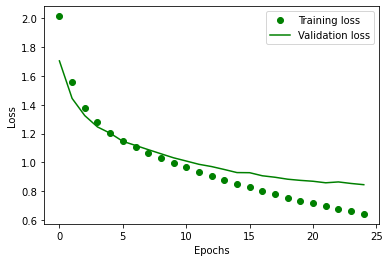

In [16]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

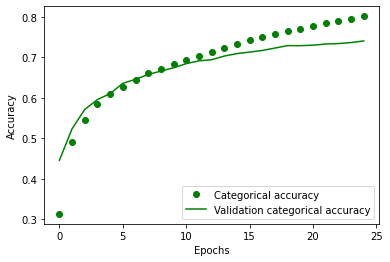

In [17]:
plt.plot(history.history['categorical_accuracy'], 'go', label='Categorical accuracy')
plt.plot(history.history['val_categorical_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
import numpy as np

yhat_test = neural.predict(x_test)
label_test = np.argmax(yhat_test, axis=1)
label_test

313/313 [==============================] - 0s 1ms/step


array([8, 1, 9, ..., 2, 6, 5])

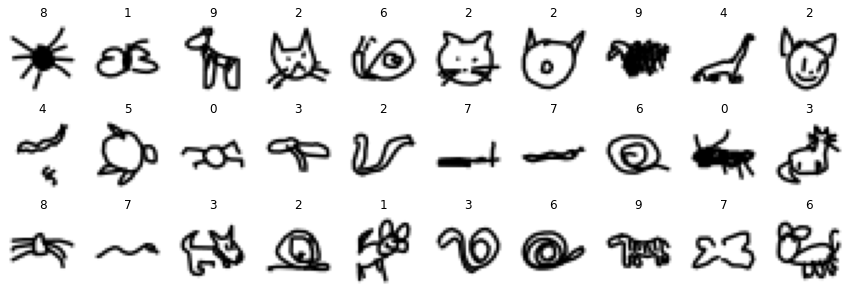

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_test[img].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(str(label_test[img]))
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix

conmat = confusion_matrix(np.argmax(y_test, axis=1), label_test)
conmat

array([[644,  29,  33,  72,  18,  21,   9,  46,  70,  40],
       [ 18, 901,  28,  32,   0,  13,   8,   8,   9,   1],
       [ 24,  17, 691, 115,  13,  22,  34,  25,  23,  17],
       [ 82,  35,  94, 612,  24,  57,  26,  44,  19,  41],
       [ 18,   3,   9,  15, 892,   0,   0,  42,   4,   8],
       [ 34,  22,  52,  72,   5, 621,  24,  32,  82,  45],
       [ 20,  29,  44,  38,   4,  19, 754,  20,   4,  19],
       [ 16,   8,  12,  39,  63,  14,  12, 842,   9,   6],
       [ 91,  33,  47,  30,   5,  62,   2,  13, 670,  14],
       [ 44,   3,  28, 119,  19,  43,  18,   8,   9, 775]])

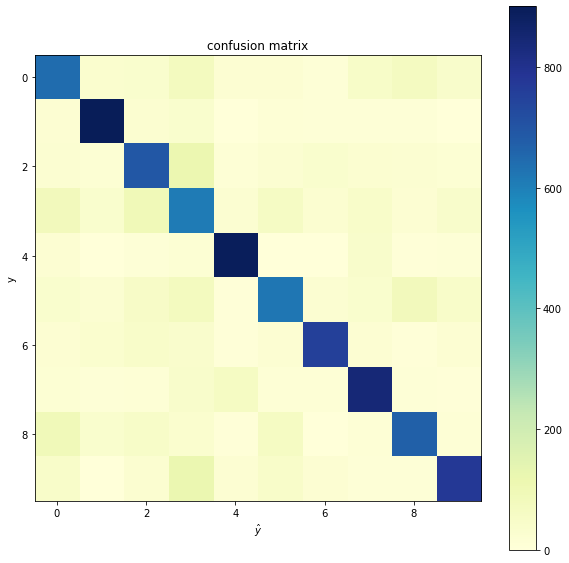

In [22]:
plt.subplots(figsize=(10, 10))
plt.imshow(conmat, cmap=plt.cm.YlGnBu, vmin=0.0)
plt.xlabel('$\hat{y}$')
plt.ylabel('y')
plt.colorbar()
plt.title('confusion matrix')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
print(f'Acc: {accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')

Acc: 0.74
bAcc: 0.74


In [24]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), label_test, digits=4))

              precision    recall  f1-score   support

           0     0.6498    0.6558    0.6528       982
           1     0.8343    0.8851    0.8589      1018
           2     0.6657    0.7044    0.6845       981
           3     0.5350    0.5919    0.5620      1034
           4     0.8552    0.9001    0.8771       991
           5     0.7122    0.6279    0.6674       989
           6     0.8501    0.7928    0.8205       951
           7     0.7796    0.8247    0.8015      1021
           8     0.7453    0.6929    0.7181       967
           9     0.8023    0.7270    0.7628      1066

    accuracy                         0.7402     10000
   macro avg     0.7429    0.7403    0.7406     10000
weighted avg     0.7426    0.7402    0.7403     10000

